## Import Libraries

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

## Loading the Dataset

In [2]:
dataset = pd.read_csv('mail_data.csv')

## Preview Dataset

In [3]:
dataset.head()

,Message,Category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


## Check Missing Values

In [4]:
dataset.isnull().sum()

Message     0
Category    0
dtype: int64

## Text Preprocessing Function

In [25]:
def preprocess_text(text):

  tokens = word_tokenize(text)

  stop_word = stopwords.words("english")
  filtered_tokens = [word for word in tokens if word.lower() not in stop_word]

  WN_Lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [WN_Lemmatizer.lemmatize(token) for token in filtered_tokens]

  preprocessed_text = " ".join(filtered_tokens)

  return preprocessed_text

## Apply Preprocessing to Dataset

In [26]:
dataset['Message'] = dataset['Message'].apply(preprocess_text)

## Separate Features and Target

In [27]:
input_data = dataset['Message']
target_data = dataset['Category']

## Encode Target Labels

In [28]:
label_encoder = LabelEncoder() 
encoded_target = label_encoder.fit_transform(target_data)

##  Split Data into Train and Test Sets

In [29]:
X_train , X_test , y_train , y_test = train_test_split(input_data , encoded_target , test_size = 0.2 , random_state = 42)

## Transform Text Data with TF-IDF

In [30]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Train Linear Regression Model

In [31]:
model = LinearRegression()
model.fit(X_train_tfidf, y_train)

LinearRegression()

## Evaluate Model Performance

In [32]:
train_score = model.score(X_train_tfidf, y_train) * 100
test_score = model.score(X_test_tfidf, y_test) * 100

In [33]:
print("Accuracy of Training Data:", train_score)
print("Accuracy of Testing Data:", test_score)

Accuracy of Training Data: 99.98209986823244
Accuracy of Testing Data: 79.15854226694417


## Make Predictions on Test Set

In [34]:
y_pred = model.predict(X_test_tfidf)

## Visualize Predictions

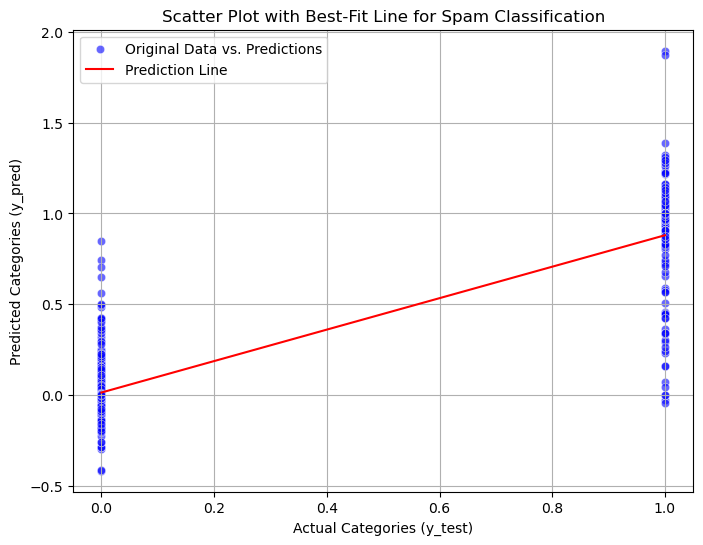

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue', label='Original Data vs. Predictions')

# Create a best-fit line using the actual vs. predicted values
x = np.linspace(min(y_test), max(y_test), 100)
m, b = np.polyfit(y_test, y_pred, 1)  # Fit the line
plt.plot(x, m * x + b, color='red', label='Prediction Line')


plt.xlabel('Actual Categories (y_test)')
plt.ylabel('Predicted Categories (y_pred)')
plt.title('Scatter Plot with Best-Fit Line for Spam Classification')

plt.legend()
plt.grid()
plt.show()


## If Company provide new data how we implement

In [35]:
new_data = ["WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

new_data

['WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']

## New data Vectorize / features extraction

In [16]:
new_data_features = vectorizer.transform(new_data)

## Predict new data

In [17]:
prediction = model.predict(new_data_features)

## Results

In [18]:
if prediction == 0:
  print("Ham Mail")
else:
  print("Spam Mail")

Spam Mail
